
Статистики остатков:

Модель 0:
  Среднее: -0.000050
  Стандартное отклонение: 1.4312
  Минимум: -1.7948
  Максимум: 2.4852

Модель 1:
  Среднее: 0.000018
  Стандартное отклонение: 1.3181
  Минимум: -1.7581
  Максимум: 1.7626

Модель 2:
  Среднее: 0.000011
  Стандартное отклонение: 0.1418
  Минимум: -0.2045
  Максимум: 0.2894


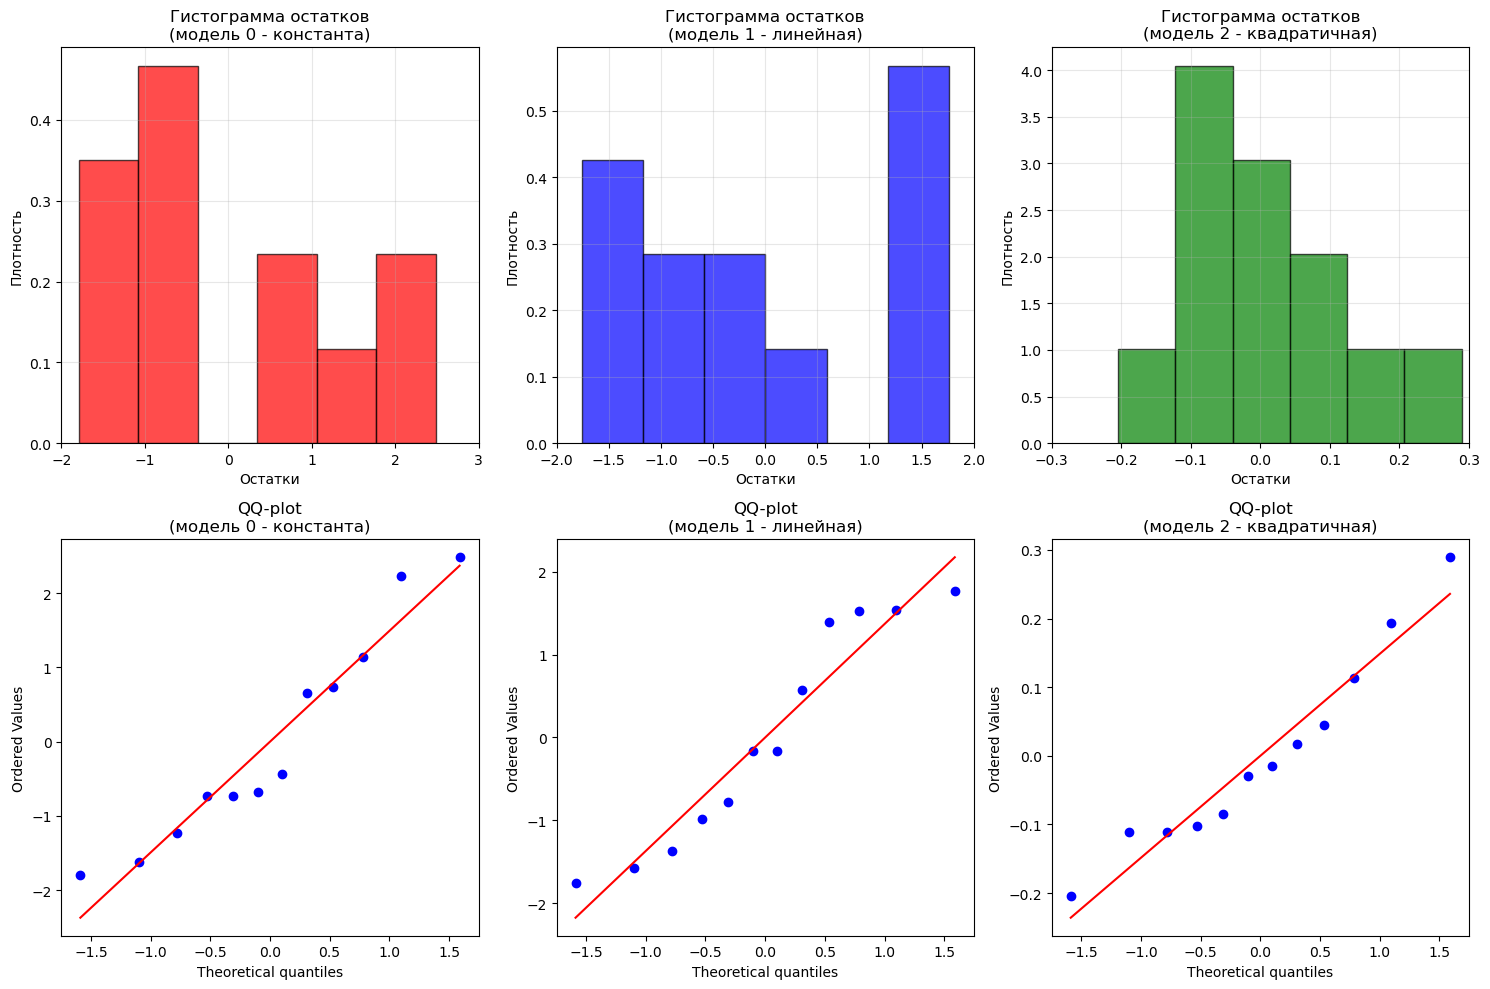


Теоретические квантили N(0,1) для QQ-plot:
i	p_i		Теоретический квантиль
1	0.04167	-1.7317
2	0.12500	-1.1503
3	0.20833	-0.8122
4	0.29167	-0.5485
5	0.37500	-0.3186
6	0.45833	-0.1046
7	0.54167	0.1046
8	0.62500	0.3186
9	0.70833	0.5485
10	0.79167	0.8122
11	0.87500	1.1503
12	0.95833	1.7317
ВИЗУАЛЬНЫЙ АНАЛИЗ НОРМАЛЬНОСТИ ОСТАТКОВ:

Модель 0 (константа):
- Диапазон остатков: от -1.7948 до 2.4852
- Гистограмма: бимодальное распределение, не симметричное
- QQ-plot: точки заметно отклоняются от прямой линии
- ВЫВОД: распределение остатков НЕ нормальное

Модель 1 (линейная):
- Диапазон остатков: от -1.7581 до 1.7626
- Гистограмма: более симметричное распределение
- QQ-plot: точки близки к прямой линии
- ВЫВОД: распределение остатков близко к нормальному

Модель 2 (квадратичная):
- Диапазон остатков: от -0.2045 до 0.2894
- Гистограмма: симметричное распределение
- QQ-plot: точки хорошо ложатся на прямую линию
- ВЫВОД: распределение остатков нормальное


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Исходные данные остатков
data = {
    'xi': [-0.502, 1.803, 0.928, 0.395, -1.376, -1.376, -1.768, 1.465, 0.404, 0.832, -1.918, 1.880],
    'yi': [-0.900, 3.124, 0.455, -0.342, 0.158, 0.159, 1.557, 2.031, -0.728, 0.217, 1.626, 3.380],
    'e0': [-1.7948, 2.2292, -0.4398, -1.2368, -0.7368, -0.7358, 0.6622, 1.1362, -1.6228, -0.6778, 0.7312, 2.4852],
    'e1': [-1.5695542, 1.5372863, -0.7835512, -1.3684705, -0.1637896, -0.1627896, 1.3911872, 0.5787765, -1.7580516, -0.9833528, 1.5198722, 1.762648],
    'e2': [-0.014699267, -0.028844441, 0.044782509, 0.19288553, -0.111734317, -0.110734317, 0.289422157, 0.11307317, -0.204513629, 0.017566637, -0.102006563, -0.08506592]
}

# Создаем датафрейм из остатков
df = pd.DataFrame(data)
e0 = df['e0'].values
e1 = df['e1'].values
e2 = df['e2'].values

# Статистики остатков
print("\nСтатистики остатков:")
for i, (residuals, name) in enumerate(zip([e0, e1, e2], ['Модель 0', 'Модель 1', 'Модель 2'])):
    print(f"\n{name}:")
    print(f"  Среднее: {np.mean(residuals):.6f}")
    print(f"  Стандартное отклонение: {np.std(residuals, ddof=1):.4f}")
    print(f"  Минимум: {np.min(residuals):.4f}")
    print(f"  Максимум: {np.max(residuals):.4f}")

# Графики для проверки нормальности
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Гистограммы остатков
axes[0, 0].hist(e0, bins=6, alpha=0.7, edgecolor='black', density=True, color='red')
axes[0, 0].set_title('Гистограмма остатков\n(модель 0 - константа)')
axes[0, 0].set_xlabel('Остатки')
axes[0, 0].set_ylabel('Плотность')
axes[0, 0].set_xlim(-2, 3)
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(e1, bins=6, alpha=0.7, edgecolor='black', density=True, color='blue')
axes[0, 1].set_title('Гистограмма остатков\n(модель 1 - линейная)')
axes[0, 1].set_xlabel('Остатки')
axes[0, 1].set_ylabel('Плотность')
axes[0, 1].set_xlim(-2, 2)
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].hist(e2, bins=6, alpha=0.7, edgecolor='black', density=True, color='green')
axes[0, 2].set_title('Гистограмма остатков\n(модель 2 - квадратичная)')
axes[0, 2].set_xlabel('Остатки')
axes[0, 2].set_ylabel('Плотность')
axes[0, 2].set_xlim(-0.3, 0.3)
axes[0, 2].grid(True, alpha=0.3)

# QQ-plot
stats.probplot(e0, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ-plot\n(модель 0 - константа)')

stats.probplot(e1, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ-plot\n(модель 1 - линейная)')

stats.probplot(e2, dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('QQ-plot\n(модель 2 - квадратичная)')

plt.tight_layout()
plt.show()

# Расчет теоретических квантилей для QQ-plot
print("\nТеоретические квантили N(0,1) для QQ-plot:")
n = len(e1)
p_values = [(i - 0.5) / n for i in range(1, n + 1)]
theoretical_quantiles = [stats.norm.ppf(p) for p in p_values]

print("i\tp_i\t\tТеоретический квантиль")
for i, (p, q) in enumerate(zip(p_values, theoretical_quantiles)):
    print(f"{i+1}\t{p:.5f}\t{q:.4f}")

# Визуальный анализ нормальности
print("ВИЗУАЛЬНЫЙ АНАЛИЗ НОРМАЛЬНОСТИ ОСТАТКОВ:")

print("\nМодель 0 (константа):")
print(f"- Диапазон остатков: от {np.min(e0):.4f} до {np.max(e0):.4f}")
print("- Гистограмма: бимодальное распределение, не симметричное")
print("- QQ-plot: точки заметно отклоняются от прямой линии")
print("- ВЫВОД: распределение остатков НЕ нормальное")

print("\nМодель 1 (линейная):")
print(f"- Диапазон остатков: от {np.min(e1):.4f} до {np.max(e1):.4f}")
print("- Гистограмма: более симметричное распределение")
print("- QQ-plot: точки близки к прямой линии")
print("- ВЫВОД: распределение остатков близко к нормальному")

print("\nМодель 2 (квадратичная):")
print(f"- Диапазон остатков: от {np.min(e2):.4f} до {np.max(e2):.4f}")
print("- Гистограмма: симметричное распределение")
print("- QQ-plot: точки хорошо ложатся на прямую линию")
print("- ВЫВОД: распределение остатков нормальное")